In [6]:
import os
import numpy as np
from scipy.io import loadmat
from utils import utils as u
import h5py
import matplotlib.pyplot as plt

In [87]:
runfile = 'normal_tensor_reg05_perc/Nikon_D70_0_19694_run0'

In [88]:
run = np.load(os.path.join('/nas/home/fpicetti/dip_prnu_anonymizer/results',
                           runfile + '.npy'), allow_pickle=True).item()

In [76]:
with h5py.File(os.path.join('/nas/home/fpicetti/dip_prnu_anonymizer/results',
                            runfile + '.hdf5'), 'r') as file:
    out = list(file['all_outputs'])

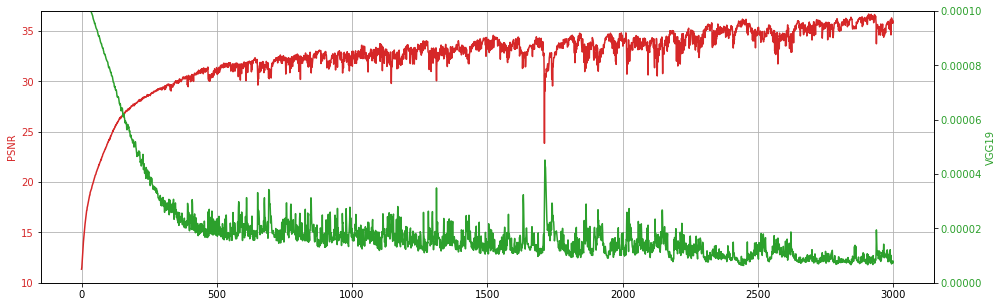

In [89]:
fig, ax = plt.subplots(figsize=(16,5))

color = 'tab:red'
ax.set_ylabel('PSNR', color=color)
ax.plot(run['history']['psnr'], color=color)
ax.tick_params(axis='y', labelcolor=color)
ax.set_ylim(10, 37)
ax.xaxis.grid(True)
ax.yaxis.grid(True)

ax2 = ax.twinx()
color = 'tab:green'
ax2.set_ylabel('VGG19', color=color)
ax2.plot(run['history']['vgg19'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 0.0001)

plt.show()

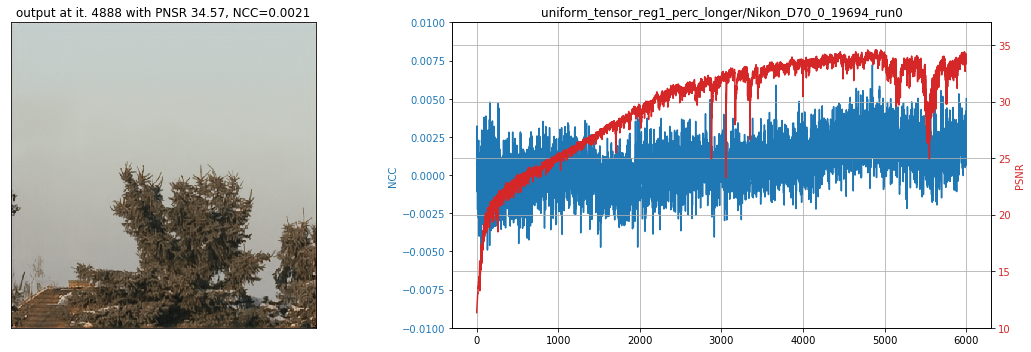

In [78]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

idx_max_psnr = np.argmax(run['history']['psnr'])

ax[0].imshow(out[idx_max_psnr])
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)
ax[0].set_title('output at it. %d with PNSR %.2f, NCC=%.4f'
                % (idx_max_psnr + 1, run['history']['psnr'][idx_max_psnr], run['history']['ncc_w'][idx_max_psnr]))

ax[1].set_title(runfile)

color = 'tab:blue'
ax[1].set_ylabel('NCC', color=color)
ax[1].plot(run['history']['ncc_w'], color=color)
ax[1].tick_params(axis='y', labelcolor=color)
ax[1].set_ylim(-0.01, 0.01)

ax2 = ax[1].twinx()

color = 'tab:red'
ax2.set_ylabel('PSNR', color=color)
ax2.plot(run['history']['psnr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(10, 37)
fig.tight_layout()
ax[1].xaxis.grid(True)
ax2.yaxis.grid(True)

plt.show()

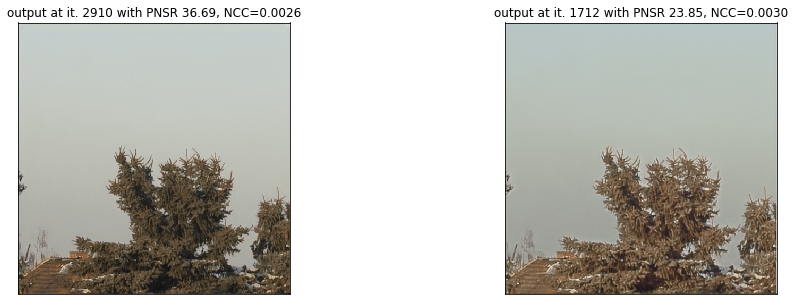

In [45]:
fig, ax = plt.subplots(1,2, figsize=(16,5))

idx_max_psnr = np.argmax(run['history']['psnr'])

ax[0].imshow(out[idx_max_psnr])
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_yaxis().set_visible(False)
ax[0].set_title('output at it. %d with PNSR %.2f, NCC=%.4f'
                % (idx_max_psnr + 1, run['history']['psnr'][idx_max_psnr], run['history']['ncc_w'][idx_max_psnr]))

lim = 1500
idx_min_psnr = np.argmin(run['history']['psnr'][lim:])


ax[1].imshow(out[lim+idx_min_psnr])
ax[1].axes.get_xaxis().set_visible(False)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].set_title('output at it. %d with PNSR %.2f, NCC=%.4f'
                % (idx_min_psnr + lim+1, run['history']['psnr'][lim+idx_min_psnr], run['history']['ncc_w'][lim+idx_min_psnr]))

plt.show()

In [22]:
idx_min_psnr

475

## Evaluate three different seeds

In [3]:
run0 = np.load(os.path.join('/nas/home/fpicetti/dip_prnu_anonymizer/results',
                           'mr_3seeds/Nikon_D70_0_19694_run0.npy'), allow_pickle=True).item()
run1 = np.load(os.path.join('/nas/home/fpicetti/dip_prnu_anonymizer/results',
                           'mr_3seeds/Nikon_D70_0_19694_run1.npy'), allow_pickle=True).item()
run2 = np.load(os.path.join('/nas/home/fpicetti/dip_prnu_anonymizer/results',
                           'mr_3seeds/Nikon_D70_0_19694_run2.npy'), allow_pickle=True).item()

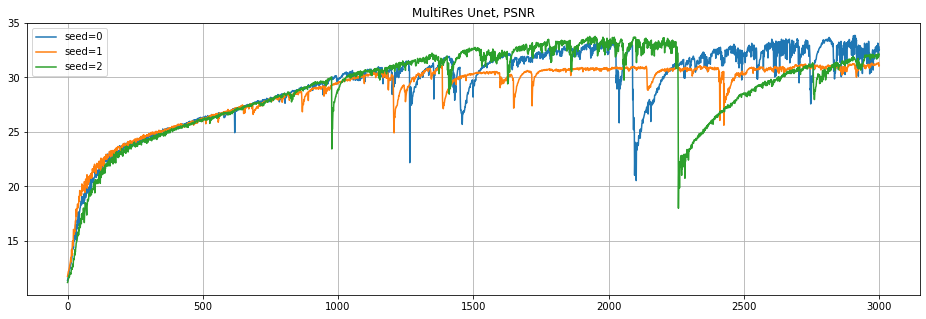

In [8]:
plt.figure(figsize=(16,5))
plt.plot(run0['history']['psnr'], label='seed=0')
plt.plot(run1['history']['psnr'][3001:], label='seed=1')
plt.plot(run2['history']['psnr'][6002:], label='seed=2')
plt.legend()
plt.title('MultiRes Unet, PSNR')
plt.grid(True)
plt.show()

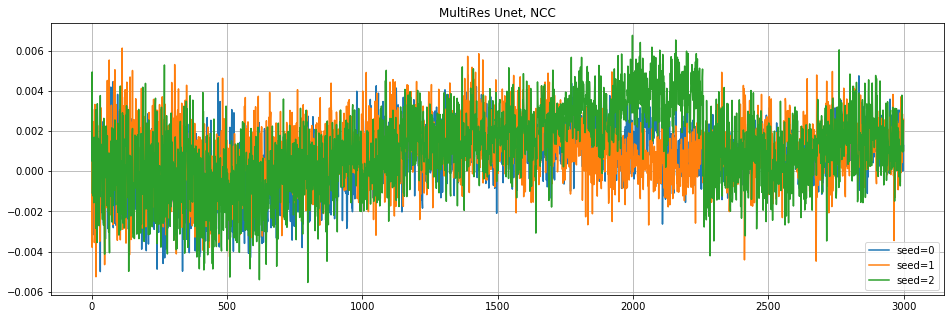

In [12]:
plt.figure(figsize=(16,5))
plt.plot(run0['history']['ncc_w'], label='seed=0')
plt.plot(run1['history']['ncc_w'], label='seed=1')
plt.plot(run2['history']['ncc_w'], label='seed=2')
plt.legend()
plt.title('MultiRes Unet, NCC')
plt.grid(True)
plt.show()